In [1]:
import matplotlib.pyplot as plt
import math
def sumaP(x,y):
    a,b=x
    c,d=y
    return (a+c,b+d)

In [132]:
def printPoints(pList, r=0.2, c='black', name='', margen=0):
    '''Imprime una lista de discos de radio r con centro en las posiciones dadas por las listas xList y yList'''
    if pList==[]:
        print("La lista de Puntos no tiene elementos")
        return
    if margen==0:margen=r #Si no se especifica un margen se da por default el radio de los discos
    (lix,liy) = pList[0]
    (lsx,lsy) = pList[0]
    fig, ax = plt.subplots()
    for p in pList:
        ax.add_patch(plt.Circle(p, r , color=c))
        x,y=p
        if x<lix:lix=x
        if x>lsx:lsx=x
        if y<liy:liy=y
        if y>lsy:lsy=y
    print("Area de Red:\nX=",lix,":",lsx,"\nY=",liy,":",lsy)
    plt.xlim( lix-margen , lsx+margen ) 
    plt.ylim( liy-margen , lsy+margen )
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    if name!='':
        plt.savefig(name,dpi=600, bbox_inches='tight')
    #plt.show()


In [54]:
def printPoints2(pList1,pList2, r=0.2, c1='black', c2='red', name='', margen=0):
    '''Imprime una lista de discos de radio r con centro en las posiciones dadas por las listas xList y yList'''
    if margen==0:margen=r #Si no se especifica un margen se da por default el radio de los discos
    (lix,liy) = pList1[0]
    (lsx,lsy) = pList1[0]
    fig, ax = plt.subplots()
    for p in pList1:
        ax.add_patch(plt.Circle(p, r , color=c1))
        x,y=p
        if x<lix:lix=x
        if x>lsx:lsx=x
        if y<liy:liy=y
        if y>lsy:lsy=y
    
    for p in pList2:
        ax.add_patch(plt.Circle(p, r , color=c2))
        x,y=p
        if x<lix:lix=x
        if x>lsx:lsx=x
        if y<liy:liy=y
        if y>lsy:lsy=y
    
    print("Area de Red:\nX=",lix,":",lsx,"\nY=",liy,":",lsy)
    plt.xlim( lix-margen , lsx+margen ) 
    plt.ylim( liy-margen , lsy+margen )
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    if name!='':
        plt.savefig(name,dpi=600, bbox_inches='tight')
    #plt.show()


In [217]:
#Métodos para crear colecciones de puntos de sierta simetría teniendo la esquina inferior izquierda en el 0,0

def rectangles(nX, nY, pX, pY):
    '''Genera una maya de puntos en simetría rectangular.
Tiene un periodo a lo largo pX y a lo alto pY
Se repite nX veces a lo largo y nY veces a lo alto'''
    if nX<1 or nY<1:
        return []
    dx = 0 #(nX*pX/2)
    dy = 0 #(nY*pY/2)
    nX, nY = nX+1, nY+1
    p = []
    for i in range(nY):
        for j in range(nX):
            p.append((j*pX-dx , i*pY-dy))
    return p

def hexagons(nX, nY, p):
    '''Genera una maya de puntos en simetría exagonal.
Tiene un periodo a lo largo p
Se repite nX veces a lo largo y nY veces a lo alto'''
    if nX<1 or nY<1:
        return []
    nX, nY = nX-1, nY-1
    l = p/(math.sqrt(3))
    dx = 0 #(nX*p/2)
    dy = 0 #(nY*l*1.5)/2
    base = [(0-dx,-l-dy), (-(p/2)-dx,(-l/2)-dy)]
    lim = [(-(p/2)-dx,(-l/2)-dy)]
    nX, nY = nX+1, nY+1
    for i in range(nY):
        tam = len(base)
        x1,y1 = sumaP(base[tam-1],(0,l))
        x2,y2 = sumaP(base[tam-2],(0,2*l))
        base.append((x1,y1))
        base.append((x2,y2))
        if x1 != -dx:
            lim.append((x1,y1))
        if x2 != -dx:
            lim.append((x2,y2))
    red = []
    for i in range(nX):
        for b in base:
            red.append(sumaP(b,(p*i,0)))
    for l in lim:
        red.append(sumaP(l,(p*nX,0)))
    return red

In [222]:
#Métodos para crear colecciones de puntos de sierta simetría centrados en el 0,0

def rectanglesC(nX,nY,pX,pY):
    '''Genera una maya de puntos en simetría rectangular.
Tiene un periodo a lo largo pX y a lo alto pY
Se repite nX veces en cada dirección a lo largo y nY veces en cada dirección a lo alto'''
    if nX<1 or nY<1: #Verificamos que al menos haya 1 repetición
        return []
    nX, nY = nX+1, nY+1
    p = []
    #Creamos todos los discos cuadrante por cuadrante
    #Discos en Cuadrante I
    for i in range(nY):
        for j in range(nX):
            p.append((j*pX , i*pY))
    #Discos en Cuadrante II
    for i in range(nY-1):
        for j in range(nX-1):
            p.append((-(j+1)*pX , (i+1)*pY))
    #Discos en Cuadrante III
    for i in range(nY):
        for j in range(nX):
            p.append((-(j)*pX , -(i)*pY))
    #Discos en Cuadrante IV
    for i in range(nY-1):
        for j in range(nX-1):
            p.append(((j+1)*pX , -(i+1)*pY))    
    return p

def hexagonsC(nX,nY,p):
    '''Genera una maya de puntos en simetría exagonal.
Tiene un periodo p
Se repite nX veces en cada dirección a lo largo y nY veces en cada dirección diagoinal'''
    if nX<1 or nY<1:
        return []
    nX, nY = nX-1, nY-1
    l = p/(math.sqrt(3))
    base = [(0,-l), (-(p/2),(-l/2)), (-(p/2),(l/2)),(0,l)]
    lim = [(-(p/2),(-l/2)),(-(p/2),(l/2))]
    nX, nY = nX+1, nY+1
    for i in range(nY):
        tam = len(base)
        x1,y1 = sumaP(base[tam-3],(0,-2*l))
        x2,y2 = sumaP(base[tam-4],(0,-l))
        x3,y3 = sumaP(base[tam-1],(0,l))
        x4,y4 = sumaP(base[tam-2],(0,2*l))
        base.append((x1,y1))
        base.append((x2,y2))
        base.append((x3,y3))
        base.append((x4,y4))
        if x1 != 0:
            lim.append((x1,y1))
        if x2 != 0:
            lim.append((x2,y2))
        if x3 != 0:
            lim.append((x3,y3))
        if x4 != 0:
            lim.append((x4,y4))
    red = []
    for i in range(nX):
        for b in base:
            red.append(sumaP(b,(p*i,0)))
            red.append(sumaP(b,((-p*i,0))))
    for l in lim:
        red.append(sumaP(l,(p*nX,0)))
    return red

In [234]:
#Métodos para crear colecciones de puntos de cierta simetría contenidos en una maya de tamaño dado

def mayaRect(lX,lY,pX,pY):
    nX = math.ceil(lX/2*pX)
    nY = math.ceil(lY/2*pY)
    return rectanglesC(nX, nY, pX, pY)
def mayaExa(lX,lY,p):
    l = p/(math.sqrt(3))
    nX = math.ceil(lX/(2*p))
    nY = math.ceil(lY/(l*3))
    return hexagonsC(nX, nY, p)
    

Area de Red:
X= -30.0 : 30.0 
Y= -23.094010767585033 : 23.094010767585033


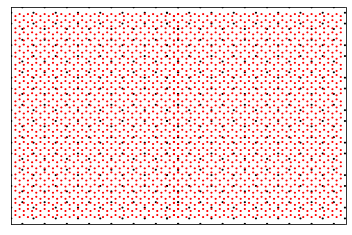

In [237]:
t1 = mayaExa(60,40,4)
t2 = mayaExa(60,40,1.5)
printPoints2(t1,t2, r=0.1, name='union4-1p5.png')

Area de Red:
X= 0 : 60 
Y= 0 : 40


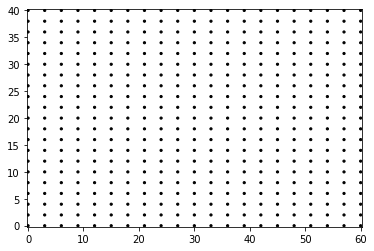

In [220]:
t2=mayaRect(60,40,3,2)
printPoints(t2)

Area de Red:
X= -30.0 : 30.0 
Y= -20.0 : 20.0


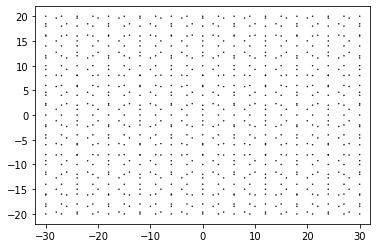

In [193]:
t = t1+t2
printPoints(t,margen=2,r=0.05, name='puntos.png')

Area de Red:
X= -1.0 : 48 
Y= -1.1547005383792517 : 42.72391992003232


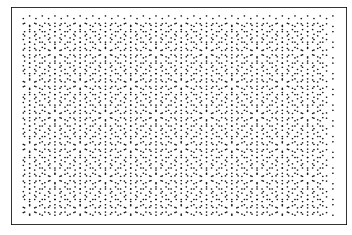

In [51]:
t3=exag(30,30,1.6)
t=t1+t3
printPoints(t,margen=2,r=0.05, name='puntos.png')

In [188]:
t1

[(-28.0, -17.897858344878404),
 (-30.0, -16.743157806499152),
 (-30.0, -14.433756729740649),
 (-28.0, -13.279056191361398),
 (-28.0, -10.969655114602896),
 (-30.0, -9.814954576223641),
 (-30.0, -7.5055534994651385),
 (-28.0, -6.350852961085889),
 (-28.0, -4.041451884327385),
 (-30.0, -2.8867513459481318),
 (-30.0, -0.5773502691896284),
 (-28.0, 0.5773502691896217),
 (-28.0, 2.886751345948125),
 (-30.0, 4.041451884327378),
 (-30.0, 6.350852961085881),
 (-28.0, 7.505553499465131),
 (-28.0, 9.814954576223634),
 (-30.0, 10.969655114602887),
 (-30.0, 13.27905619136139),
 (-28.0, 14.43375672974064),
 (-28.0, 16.743157806499145),
 (-30.0, 17.897858344878397),
 (-24.0, -17.897858344878404),
 (-26.0, -16.743157806499152),
 (-26.0, -14.433756729740649),
 (-24.0, -13.279056191361398),
 (-24.0, -10.969655114602896),
 (-26.0, -9.814954576223641),
 (-26.0, -7.5055534994651385),
 (-24.0, -6.350852961085889),
 (-24.0, -4.041451884327385),
 (-26.0, -2.8867513459481318),
 (-26.0, -0.5773502691896284),
 

In [ ]:
len([(1,3),(1,4),(3,0)])

Area de Red:
X= -30.0 : 30.0 
Y= -20.0 : 20.0


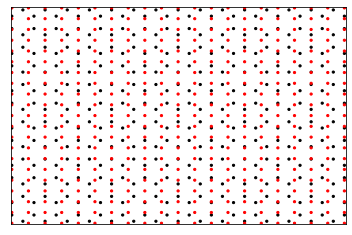

In [194]:
printPoints2(t1,t2, r=0.2, name='bicolor.png')

Area de Red:
X= -0.5 : 0.5 
Y= -0.5773502691896258 : 0.5773502691896258


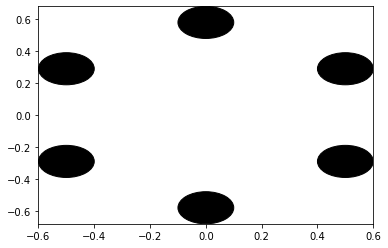

In [153]:
t1=exag2(1,1,1)
printPoints(t1, r=0.1)

Area de Red:
X= -9.0 : 7.0 
Y= -8.5 : 6.5


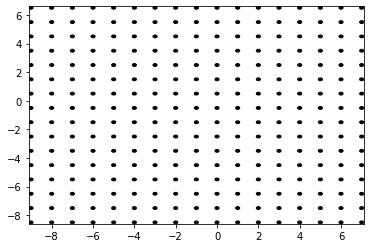

In [155]:
t2=rectangles2(16,15,1,1)
printPoints(t2, r=0.1)

In [140]:
ff

[(3, 5), (1, 0), (2, 5), (0, 0)]

In [198]:
math.ceil(2.333)

3

Area de Red:
X= -19.5 : 19.5 
Y= -13.567731325956212 : 13.567731325956212


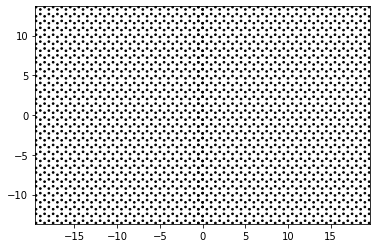

In [228]:
t2=hexagonsC(20,15,1)
printPoints(t2, r=0.1)